In [67]:
application = 'Innovation_Vineyards'

In [68]:
%matplotlib inline

In [69]:
import pathlib
from calendar import month_abbr

In [70]:
from matplotlib import pyplot as plt 

In [71]:
import pandas as pd

In [72]:
import numpy as np

In [73]:
HOME = pathlib.Path.home()

### some definitions here 

In [74]:
varname = 'SOILM'

In [75]:
dpath = HOME.joinpath(f"research/Smart_Ideas/outputs/targets/application_cases/{application}/DAILY/{varname}")

In [76]:
lfiles = list(dpath.glob("*.csv"))

In [77]:
lfiles

[PosixPath('/home/nicolasf/research/Smart_Ideas/outputs/targets/application_cases/Innovation_Vineyards/DAILY/SOILM/Daily_SOILM.csv')]

In [78]:
dpath = HOME.joinpath(f"research/Smart_Ideas/outputs/targets/application_cases/{application}/DAILY/{varname}")

lfiles = list(dpath.glob("*.csv"))

data = pd.read_csv(dpath.joinpath(f"Daily_{varname}.csv"), index_col=0, parse_dates=True)

### remove the lat and lon 
data = data.iloc[:,[-1]]

In [79]:
## ----------------------------------------------------------------------------------------------- 
## calculates the seasonal averages 
df_m = data.resample('1M').mean()

df_s = df_m.rolling(window=3, min_periods=3).mean()

df_s = df_s.iloc[2:,:]

opath_seasonal = HOME.joinpath(f"research/Smart_Ideas/outputs/targets/application_cases/{application}/SEASONAL/{varname}")

if not opath_seasonal.exists(): 
    opath_seasonal.mkdir(parents=True)

df_s.to_csv(opath_seasonal.joinpath(f"Seasonal_{varname}_mean.csv"))

<AxesSubplot:xlabel='time'>

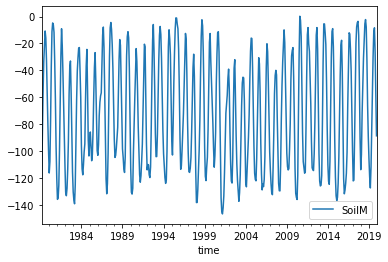

In [80]:
df_s.plot()

In [81]:
### plots the seasonal distribution of the number of days below threshold 
clim = df_s.loc['1981':'2010',:]

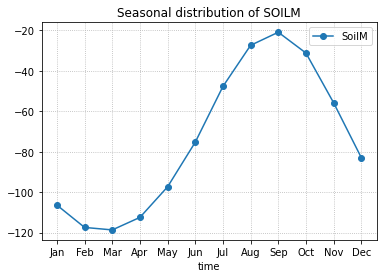

In [82]:
### plots the seasonal distribution of the number of days below threshold 
clim = df_s.loc['1981':'2010',:]

f, ax = plt.subplots()
clim.groupby(clim.index.month).mean().plot(ax=ax, marker='o')
ax.grid(ls=':')
ax.set_xticks(np.arange(1,12+1))
ax.set_xticklabels(month_abbr[1:]); 
ax.set_title(f"Seasonal distribution of {varname}")
f.savefig(f'../figures/seasonal_distribution_{varname}.png', dpi=200, bbox_inches='tight')

In [83]:
def demean(x): 
    return x - x.loc['1981':'2010',:].mean() 

In [84]:
anoms = df_s.groupby(df_s.index.month).apply(demean)

<AxesSubplot:xlabel='time'>

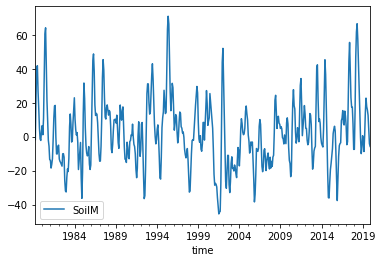

In [85]:
anoms.plot()

In [86]:
anoms.to_csv(opath_seasonal.joinpath(f"Seasonal_{varname}_anomalies.csv"))